### t-distribution Stochastic Neighbor Embedding (t-SNE) tutorial

Load packages

In [33]:
from keras.datasets import mnist
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
from utils import visualize_mnist

import warnings, random
warnings.filterwarnings('ignore')

random.seed(1)
np.random.seed(1)

Load MNIST dataset

In [34]:
N = 5000 # number of samples

# load dataset using keras
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# concat train & test dataset
full_imgs = np.concatenate((x_train,x_test), axis=0)
full_y = np.concatenate((y_train,y_test))

# randomly select 500 samples
sampling_idx = np.random.randint(0,full_imgs.shape[0], size=(N,))
imgs, labels = full_imgs[sampling_idx], full_y[sampling_idx]

# flatten images to 1d vector
X = imgs.reshape(N, -1)

print(f'img shape : {imgs.shape} | X shape : {X.shape} | labels shape : {labels.shape}')

img shape : (5000, 28, 28) | X shape : (5000, 784) | labels shape : (5000,)


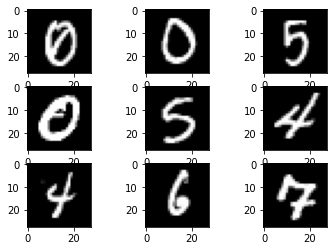

In [35]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(imgs[i], cmap=plt.get_cmap('gray'))

implements t-SNE using sklearn

In [36]:
D = 2 # embedding dimensions
P = 5 # perplexity

s_time = time.time()
t_sne = TSNE(n_components=D, perplexity=P, random_state=0)
X_reduced = t_sne.fit_transform(X)
required_time = time.time()-s_time

print(f't-SNE required time with samples {N} : {required_time}')

t-SNE required time with samples 5000 : 5.824100971221924


Visualization

(<Figure size 864x864 with 1 Axes>,
 <AxesSubplot:title={'center':'t-SNE results of MNIST'}>,
 [Text(-36.35783, 72.846115, '0'),
  Text(-3.59811, -67.47459, '1'),
  Text(-60.718872, -41.294827, '2'),
  Text(-65.37222, 8.922259, '3'),
  Text(37.82317, 3.921598, '4'),
  Text(-4.3240666, 31.58471, '5'),
  Text(22.84274, 70.02765, '6'),
  Text(70.294685, -49.61997, '7'),
  Text(-17.978264, -6.541688, '8'),
  Text(52.400383, -4.5644403, '9')])

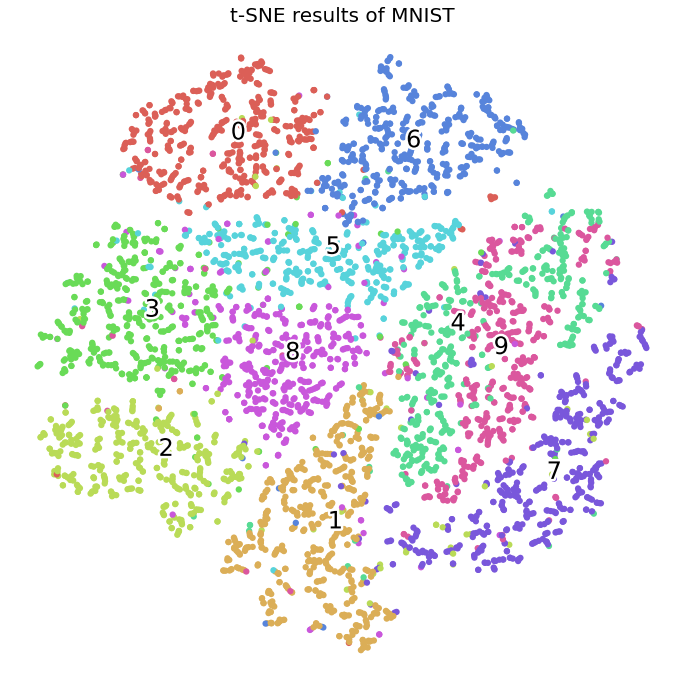

In [37]:
title = 't-SNE results of MNIST'
visualize_mnist(X_reduced, labels, title)

### Perplexity에 따른 t-SNE 변화 확인

perplexity를 5~50까지 5 단위로 비교

t-SNE required time with perplexity 5 : 5.89793062210083
t-SNE required time with perplexity 10 : 6.3168253898620605
t-SNE required time with perplexity 15 : 6.9895102977752686
t-SNE required time with perplexity 20 : 7.6737635135650635
t-SNE required time with perplexity 25 : 7.742628574371338
t-SNE required time with perplexity 30 : 8.196652173995972
t-SNE required time with perplexity 35 : 8.85589861869812
t-SNE required time with perplexity 40 : 9.240201473236084
t-SNE required time with perplexity 45 : 9.62492036819458
t-SNE required time with perplexity 50 : 9.937114477157593


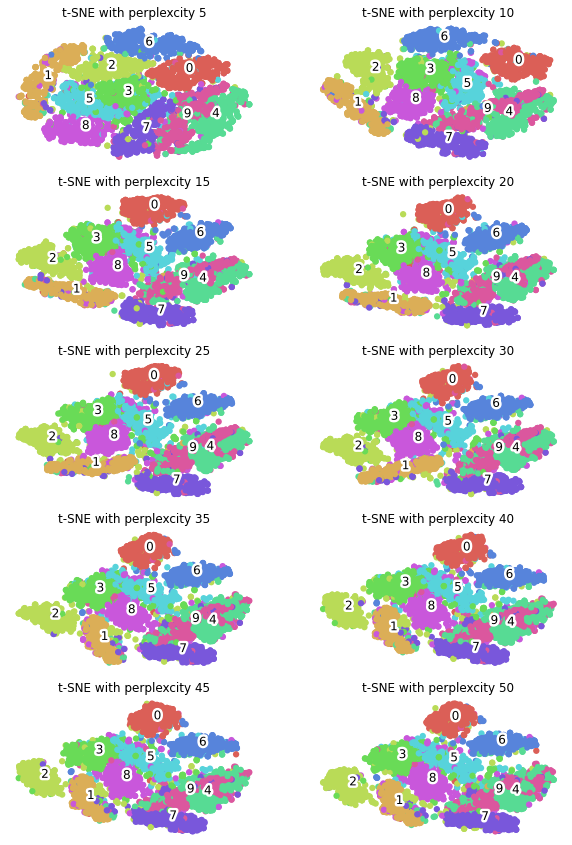

In [25]:
p_list = range(5,51,5)

plt.figure(figsize=(10,15))
for i, p in enumerate(p_list):
    s_time = time.time()
    t_sne = TSNE(n_components=D, perplexity=p, random_state=0)
    X_reduced = t_sne.fit_transform(X)
    required_time = time.time()-s_time

    print(f't-SNE required time with perplexity {p} : {required_time}')
    
    title = f't-SNE with perplexcity {p}'
    
    plt.subplot(5,2,i+1)
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    plt.scatter(X_reduced[:,0], X_reduced[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.title(title)
    plt.axis('off')
    plt.axis('tight')
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(X_reduced[labels == i, :], axis=0)
        txt = plt.text(xtext, ytext, str(i), fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)


저자들의 주장처럼 t-SNE가 perplexcity의 변화에 강건한 것을 확인

### LLE vs t-SNE

LLE와 t-SNE를 비교하기 위한 실험
sklearn을 이용하였으며 인자는 모두 default값 사용

In [38]:
from sklearn.manifold import LocallyLinearEmbedding

In [39]:
# t-SNE
s_time = time.time()
t_sne = TSNE(n_components=2, random_state=0)
X_sne = t_sne.fit_transform(X)
sne_time = time.time()-s_time

# LLE
s_time = time.time()
lle = LocallyLinearEmbedding(n_components=2, random_state=0)
X_lle = lle.fit_transform(X)
lle_time = time.time()-s_time

print(f't-SNE required time : {sne_time} | LLE required time : {lle_time} ')

t-SNE required time : 8.431736707687378 | LLE required time : 5.15263032913208 


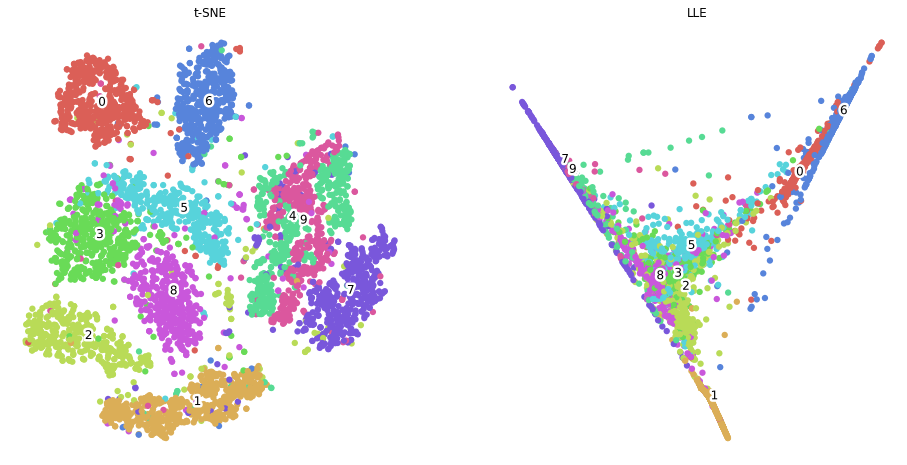

In [42]:
# visualization
plt.figure(figsize=(16,8))
for i in range(1,3):
    if i == 1:
        X_reduced = X_sne
        title = 't-SNE'
    else:
        X_reduced = X_lle
        title = 'LLE'
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("hls", num_classes))

    plt.subplot(1,2,i)

    plt.scatter(X_reduced[:,0], X_reduced[:,1], lw=0, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    plt.title(title)
    plt.axis('off')
    plt.axis('tight')
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(X_reduced[labels == i, :], axis=0)
        txt = plt.text(xtext, ytext, str(i), fontsize=12)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

확률적으로 $x_i$를 표현한 t-SNE가 더 좋은 차원축소 성능을 보임